In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and Visualizing the data

In [2]:
data=pd.read_csv('Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# checking the number of rows and columns in the data
data.shape

(167, 10)

In [5]:
# checking the datatype and the missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# describing the data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Cleaning the data

In [7]:
# checking if there are any null values 
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# there are no null values 

In [9]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
# as there are couple of columns in percentage form we have to convert them into their normal values  

In [11]:
data['imports']=(data['imports']*data['gdpp'])/100
data['health']=(data['health']*data['gdpp'])/100
data['exports']=(data['exports']*data['gdpp'])/100

In [12]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# EDA

### Univariate Analysis

######  Numerical univariate analysis

In [13]:
cols=data.select_dtypes([np.number]).columns

In [14]:
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

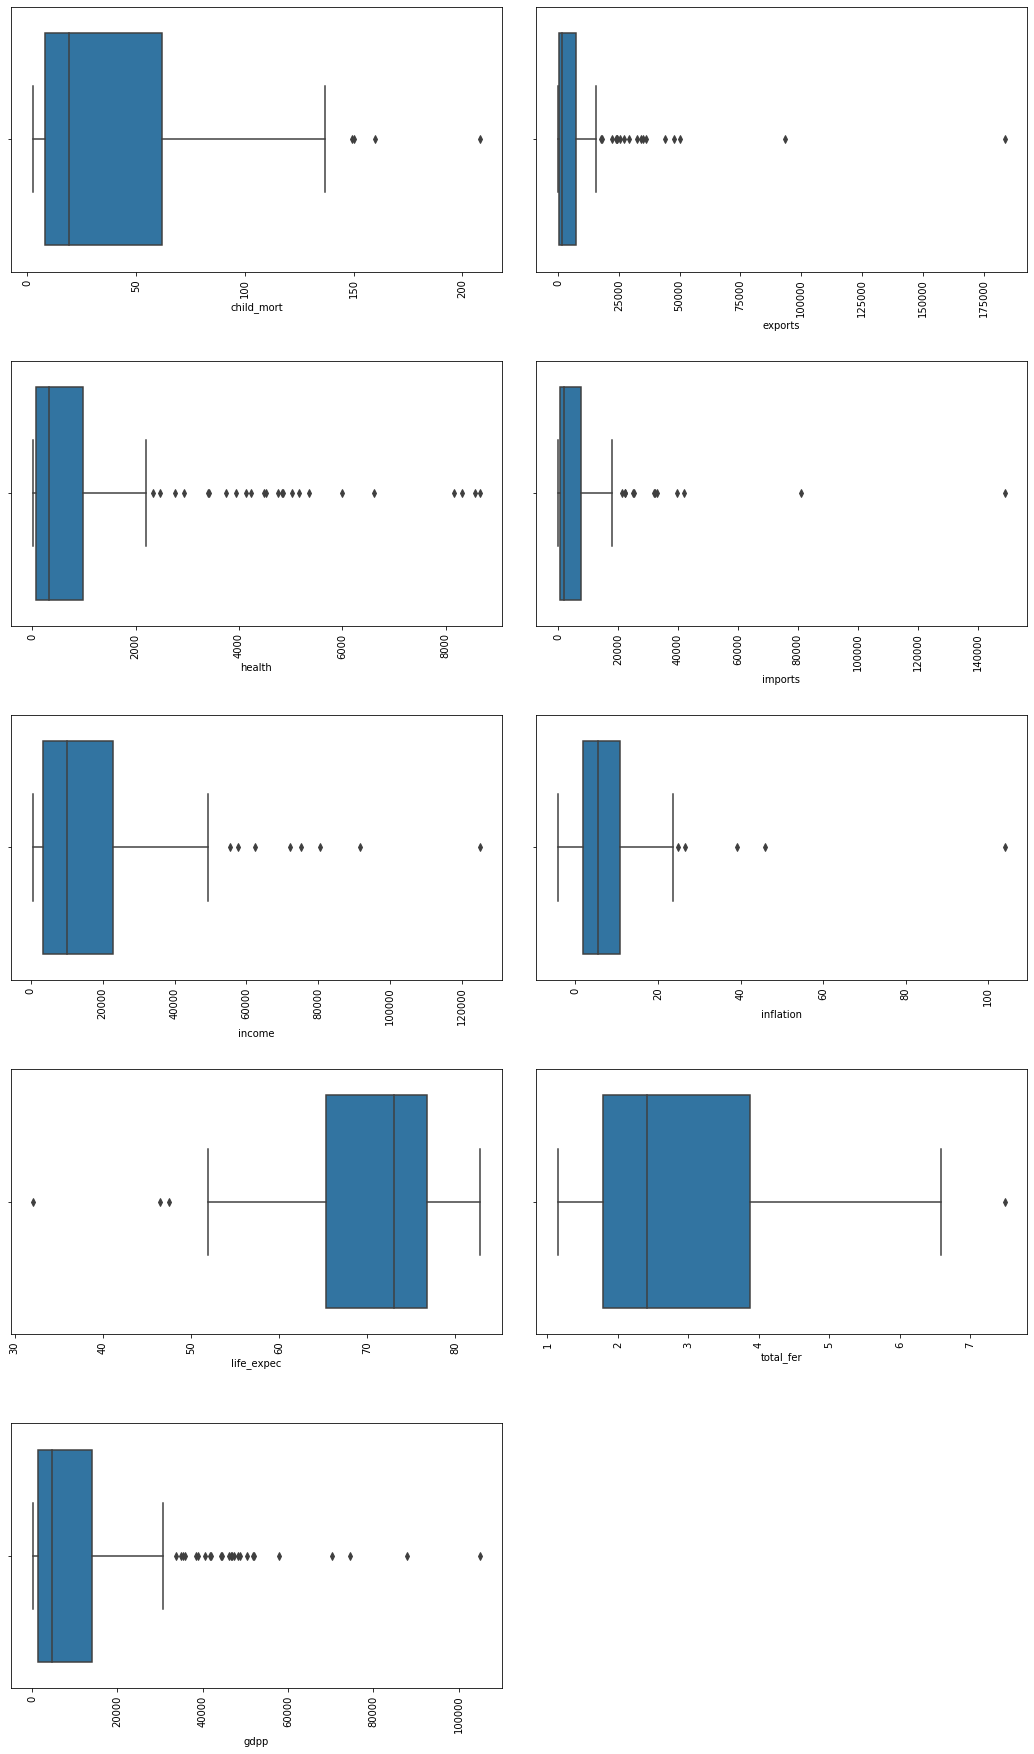

In [15]:
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.show()

In [16]:
# there are outliers in every column hence we will remove them

In [17]:
def upper_cap_outlier_treatment(data, col):
    
    Q1 = data[col].quantile(0.25)

    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    higher_cap = Q3+1.5*IQR

    data.loc[(data[col] > higher_cap), col] = higher_cap
      
    return data

In [18]:
def lower_cap_outlier_treatment(data, col):
    
    Q1 = data[col].quantile(0.25)

    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    data.loc[(data[col] < lower_cap), col] = lower_cap
    
    return data

In [19]:
# we should not deal with upper range outliers in child_mort and inflation because we can lose information and we should cap 
# the lower range outliers 

In [20]:
data=lower_cap_outlier_treatment(data,'child_mort')
data=lower_cap_outlier_treatment(data,'inflation')

In [21]:
# we should not deal with lower range outliers in all the features except child_mort and inflation because we can loose 
#information and we should cap the higher range outliers 

In [22]:
data=upper_cap_outlier_treatment(data,'exports')
data=upper_cap_outlier_treatment(data,'health')
data=upper_cap_outlier_treatment(data,'imports')
data=upper_cap_outlier_treatment(data,'income')
data=upper_cap_outlier_treatment(data,'life_expec')
data=upper_cap_outlier_treatment(data,'total_fer')
data=upper_cap_outlier_treatment(data,'gdpp')

In [23]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [24]:
data.shape

(167, 10)

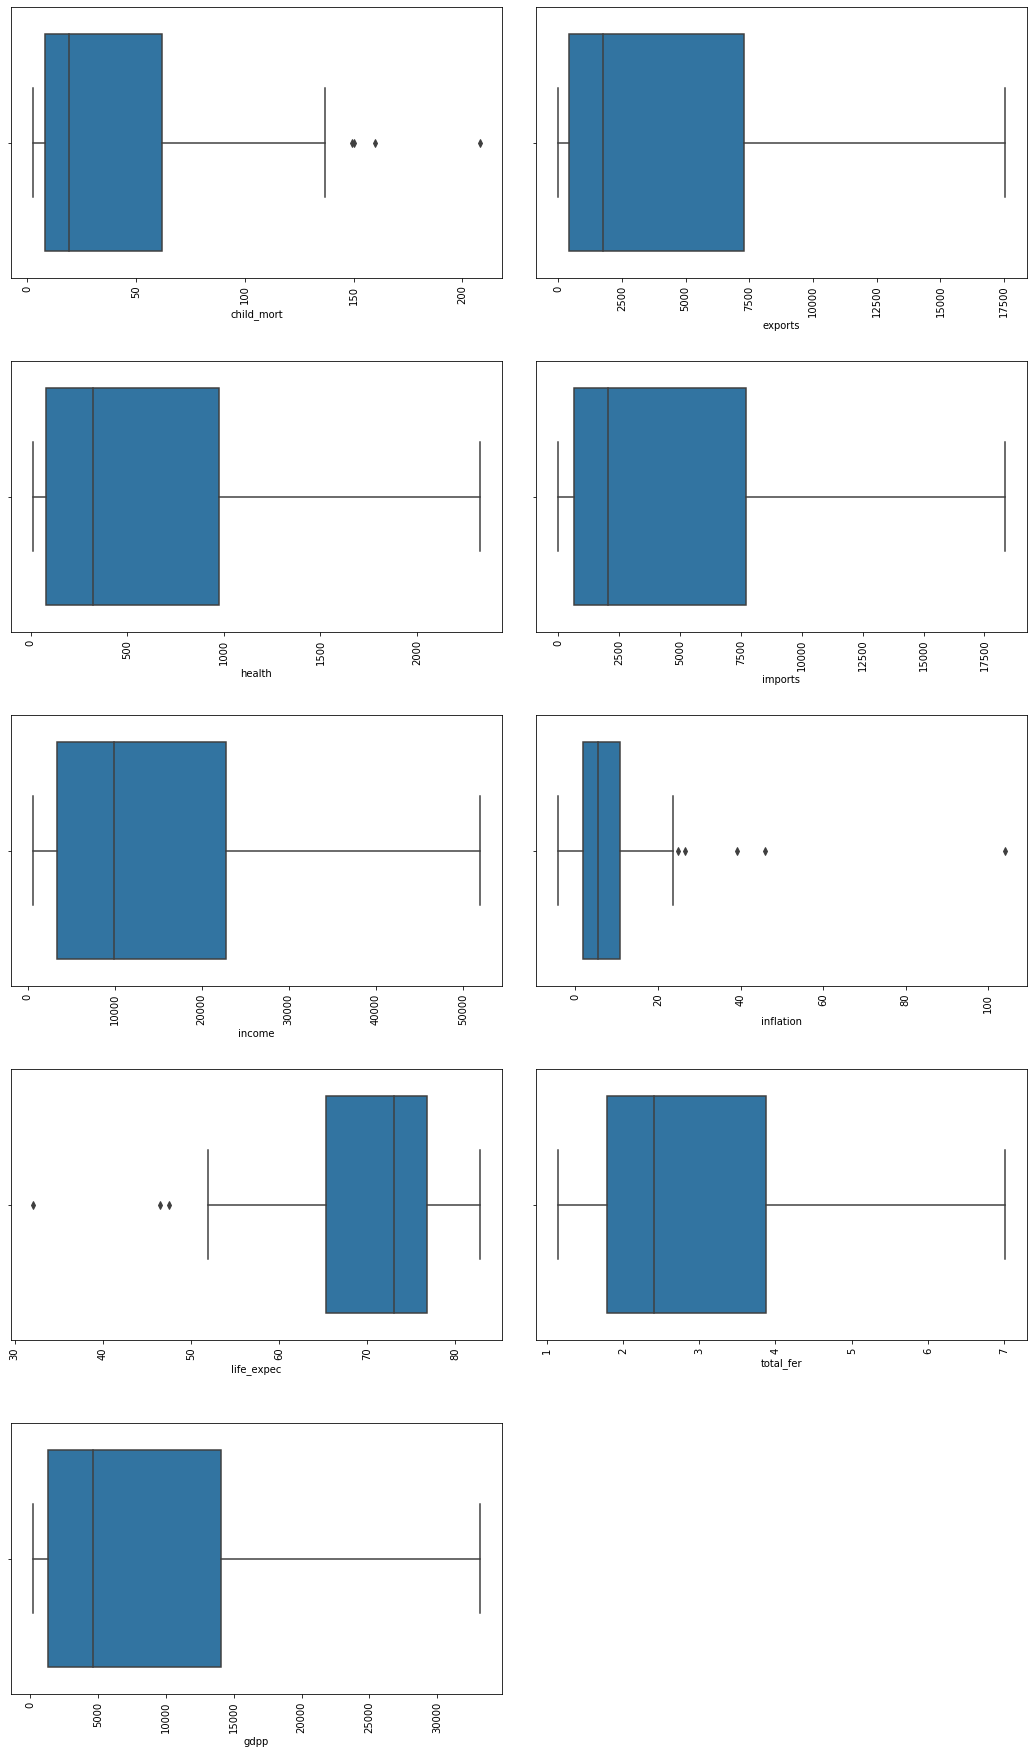

In [25]:
# for 
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.show()

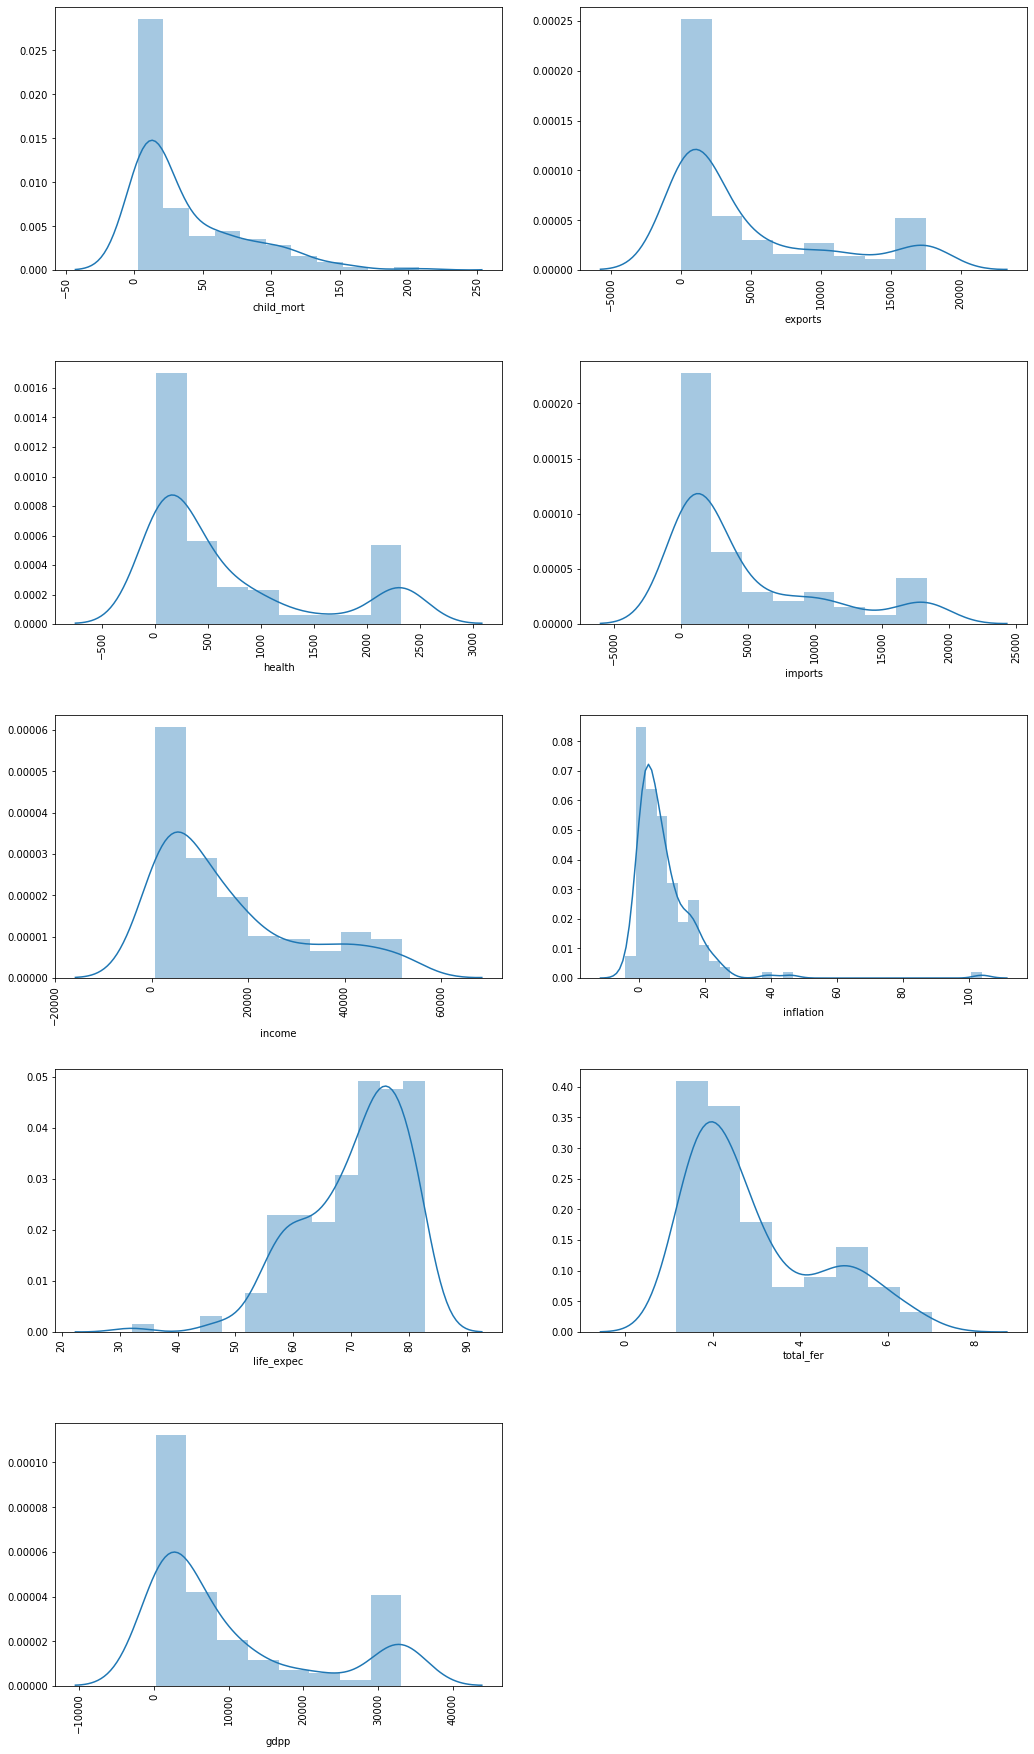

In [26]:
# for plotting distplot
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(data[i[1]])
    plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.show()

# Bivariate and Multivariate analysis

###### Numeric - Numeric analysis

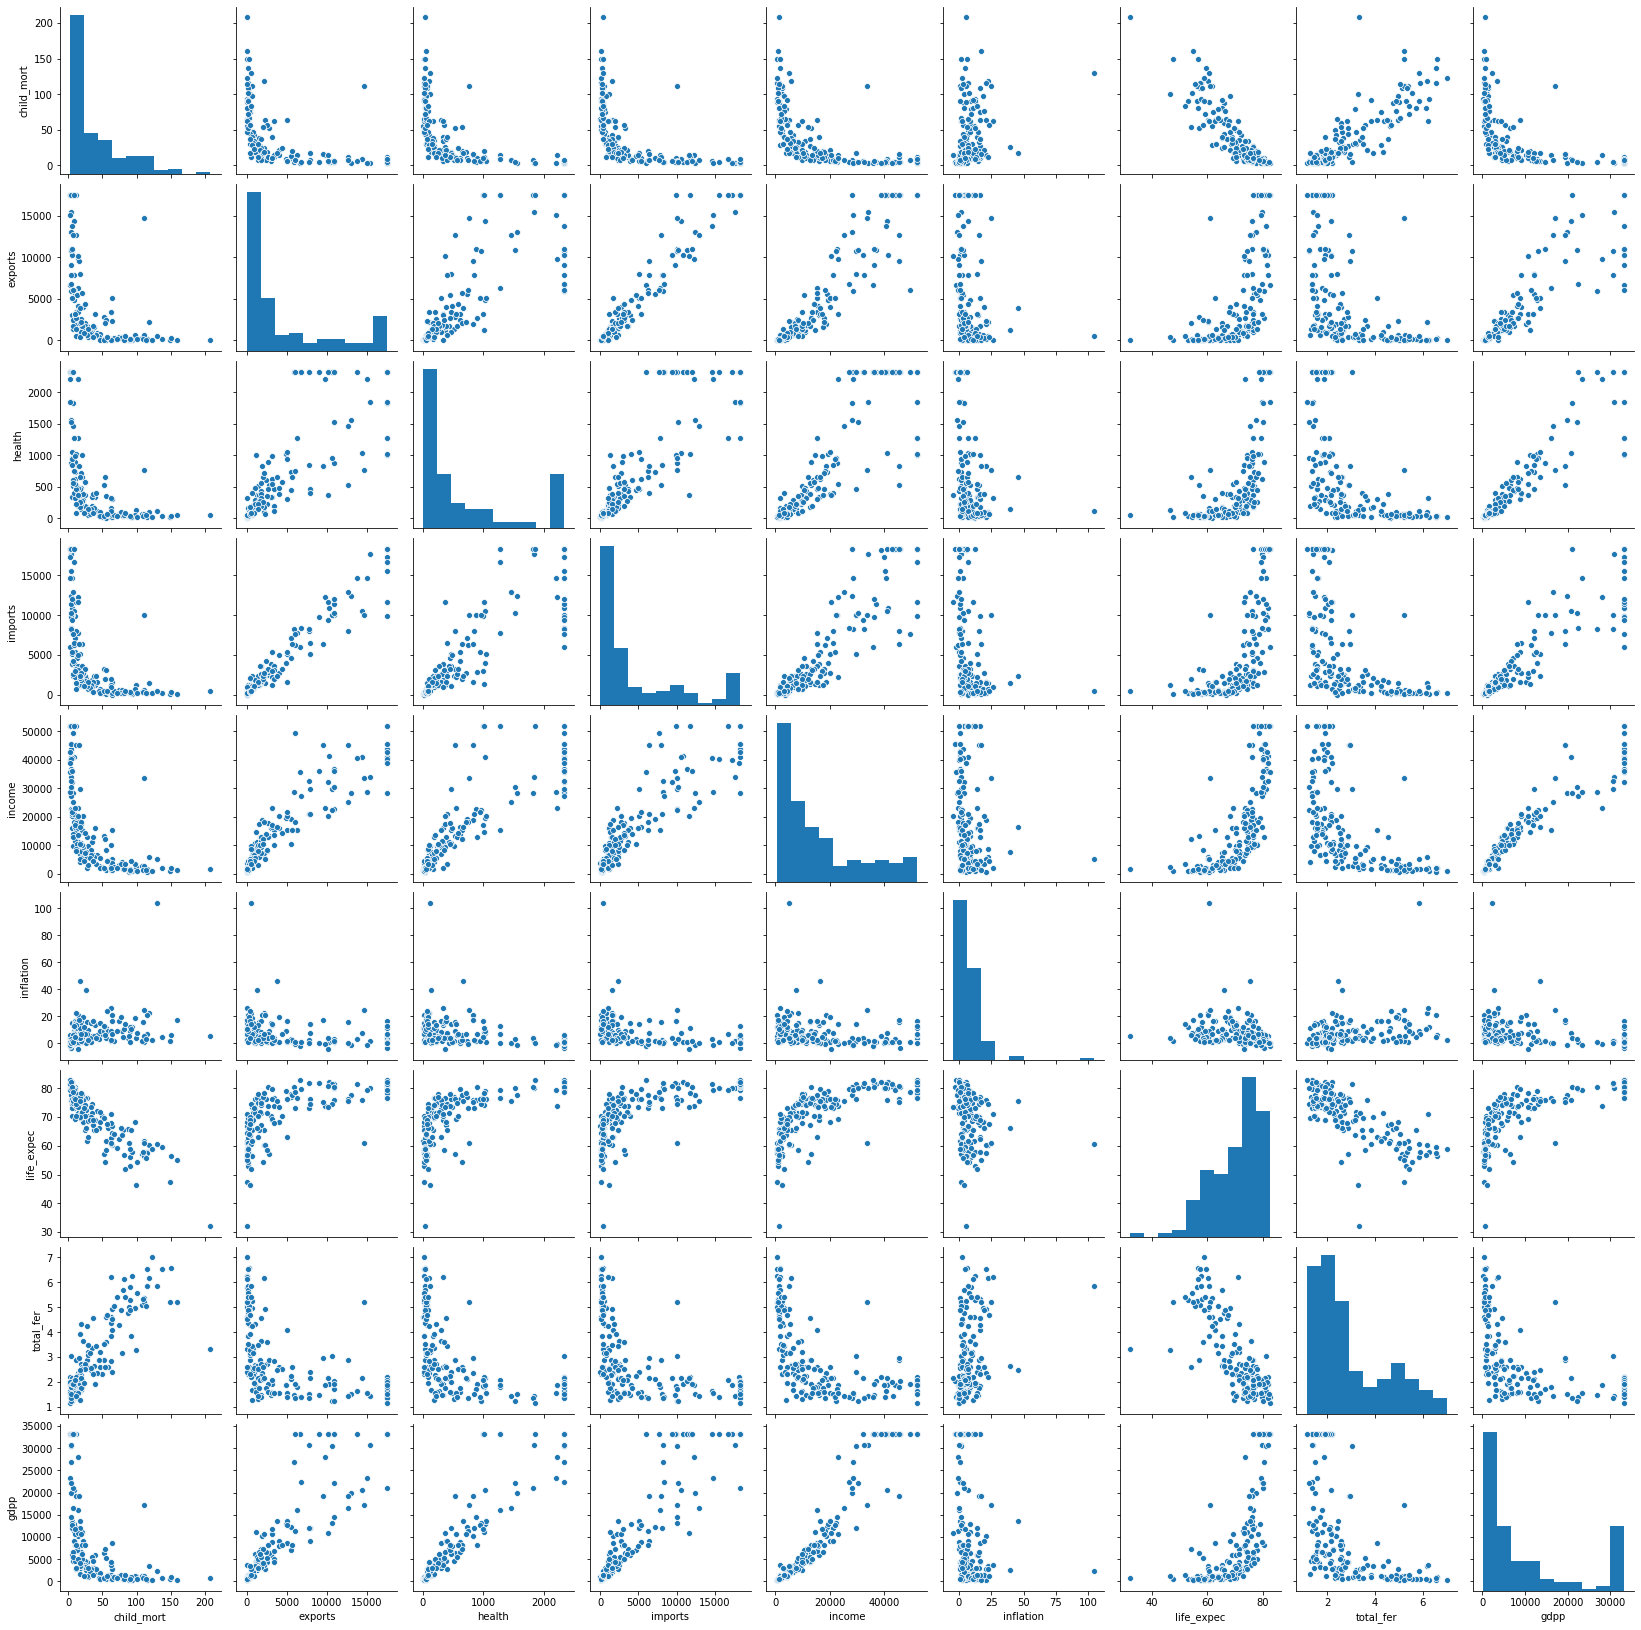

In [27]:
sns.pairplot(data)
plt.show()

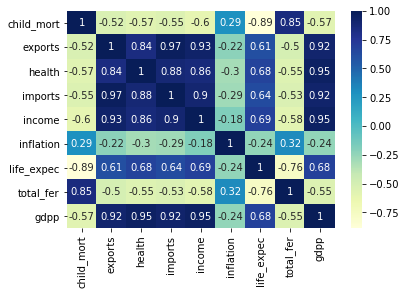

In [28]:
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")
plt.show()

# Clustering 

### Hopkins Test

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(data.drop('country',axis=1))

0.9174993340799684

In [31]:
# we can say from the Hopkins test the given data is good for clustering 

### Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data1=ss.fit_transform(data.drop('country',axis=1))
data1

array([[ 1.29153238, -0.80056371, -0.79556251, ..., -1.61909203,
         1.91527602, -0.84634107],
       [-0.5389489 , -0.61314982, -0.51391972, ...,  0.64786643,
        -0.86277926, -0.54082746],
       [-0.27283273, -0.51557561, -0.6160104 , ...,  0.67042323,
        -0.03669088, -0.50886816],
       ...,
       [-0.37231541, -0.64788476, -0.73612924, ...,  0.28695762,
        -0.66291917, -0.78095407],
       [ 0.44841668, -0.74249447, -0.76323195, ..., -0.34463279,
         1.14914567, -0.78095407],
       [ 1.11495062, -0.71718267, -0.7406285 , ..., -2.09278484,
         1.63547189, -0.7679976 ]])

In [33]:
data1=pd.DataFrame(data1)
data1.columns=data.columns[1:]
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.800564,-0.795563,-0.794660,-0.943936,0.157336,-1.619092,1.915276,-0.846341
1,-0.538949,-0.613150,-0.513920,-0.488076,-0.395181,-0.312347,0.647866,-0.862779,-0.540827
2,-0.272833,-0.515576,-0.616010,-0.591590,-0.199291,0.789274,0.670423,-0.036691,-0.508868
3,2.007808,-0.431911,-0.722418,-0.571509,-0.660984,1.387054,-1.179234,2.141784,-0.589198
4,-0.695634,0.144450,0.069070,0.428104,0.209637,-0.601749,0.704258,-0.543003,0.159686


### KMeans Clustering

In [34]:
from sklearn.cluster import KMeans

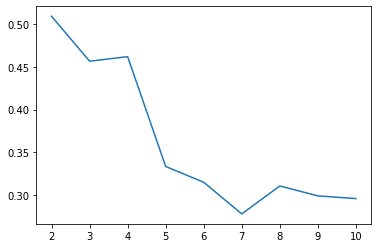

In [35]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters = k).fit(data1)
    ss.append([k,silhouette_score(data1, kmean.labels_)])

sil=pd.DataFrame(ss)
plt.plot(sil[0], sil[1])
plt.show()

In [36]:
# silhouette_score
ss

[[2, 0.5088327229667853],
 [3, 0.4564220550203657],
 [4, 0.46170667430941725],
 [5, 0.3336627257635976],
 [6, 0.31526100181077726],
 [7, 0.27834700340111684],
 [8, 0.31095217771514866],
 [9, 0.29936532507851393],
 [10, 0.2962290453628769]]

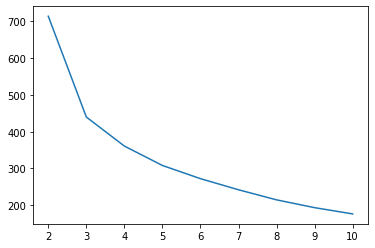

In [37]:
## Elbow Cuve
ssd=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k).fit(data1)
    ssd.append([k,kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])
plt.show()

In [38]:
# According to the elbow method the value of K should be 3 
# According to the silhouette Score method K should be 2

### Optimal Number of K=3

#### Initialising kMeans

In [39]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [41]:
## Adding the labels with the original Data
data['cluster_id']=kmeans.labels_

In [42]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [43]:
data.cluster_id.unique()

array([2, 0, 1])

In [44]:
# Check the number of Data Points in each cluster
data.cluster_id.value_counts()

0    81
2    45
1    41
Name: cluster_id, dtype: int64

### Plotting the cluster WRT to the data

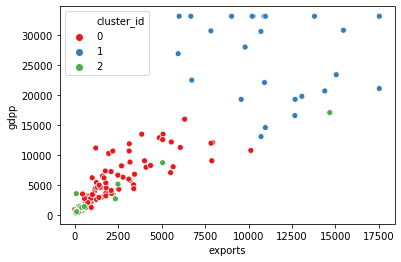

In [45]:
sns.scatterplot(x='exports',y='gdpp',hue='cluster_id',legend='full',data=data, palette='Set1')
plt.show()

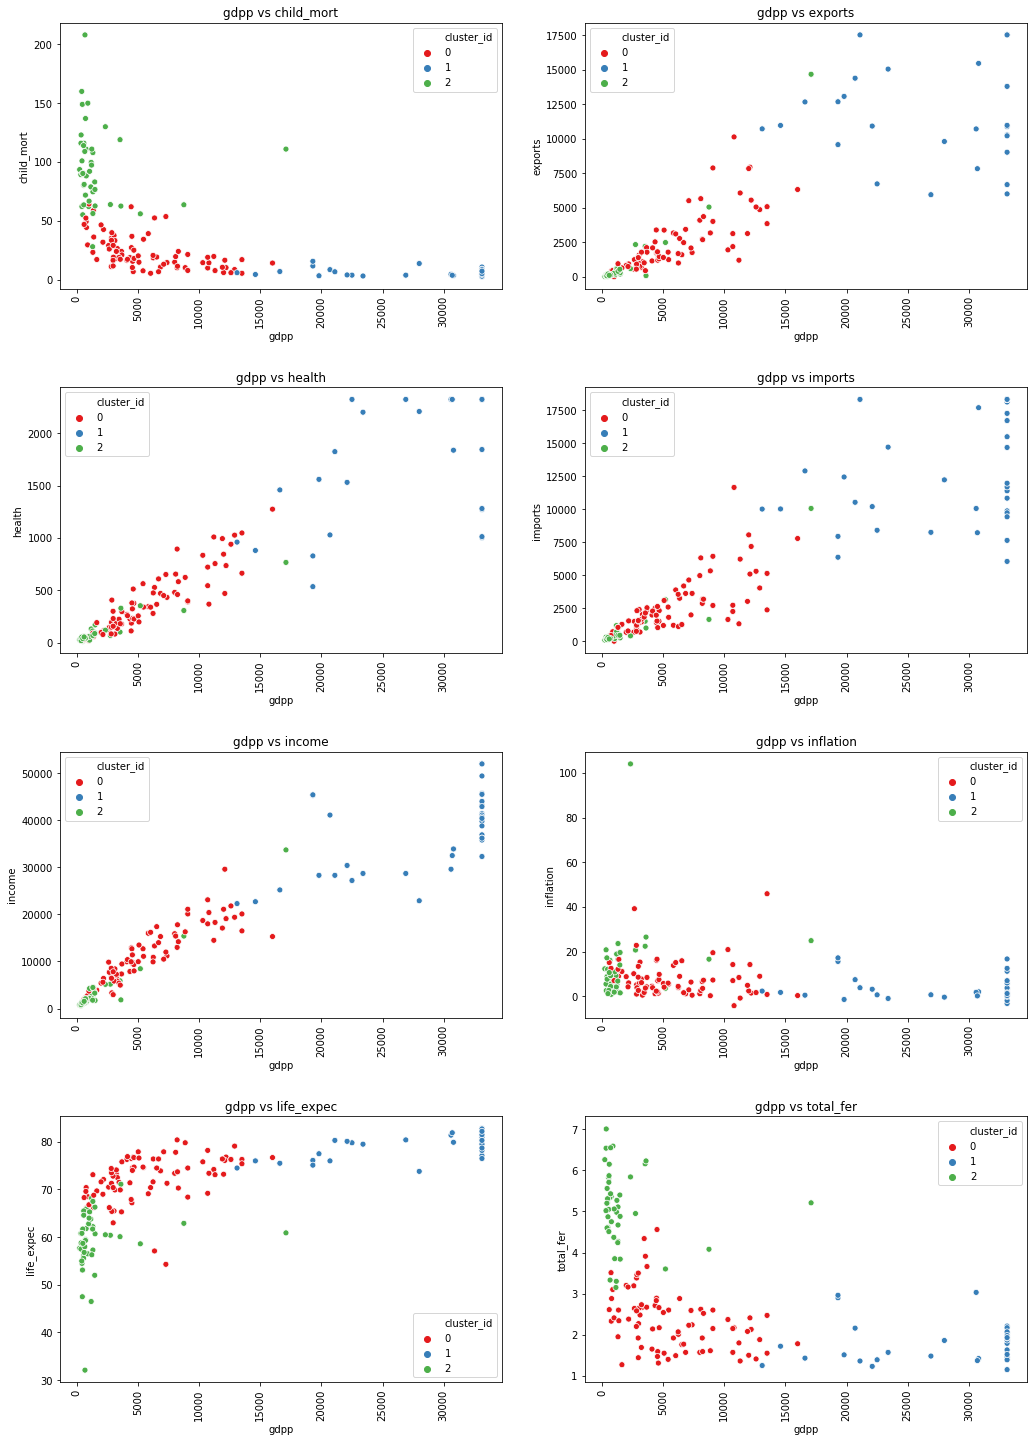

In [46]:
# for plotting scatter plot gdpp with respect to other numerical columns with hue as cluster_id
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    if i[1]!='gdpp':
        plt.subplot(5,2,i[0]+1)
        sns.scatterplot(data=data,y=i[1],x='gdpp',hue='cluster_id',legend='full',palette='Set1')
        plt.xticks(rotation=90)
        plt.title('gdpp vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

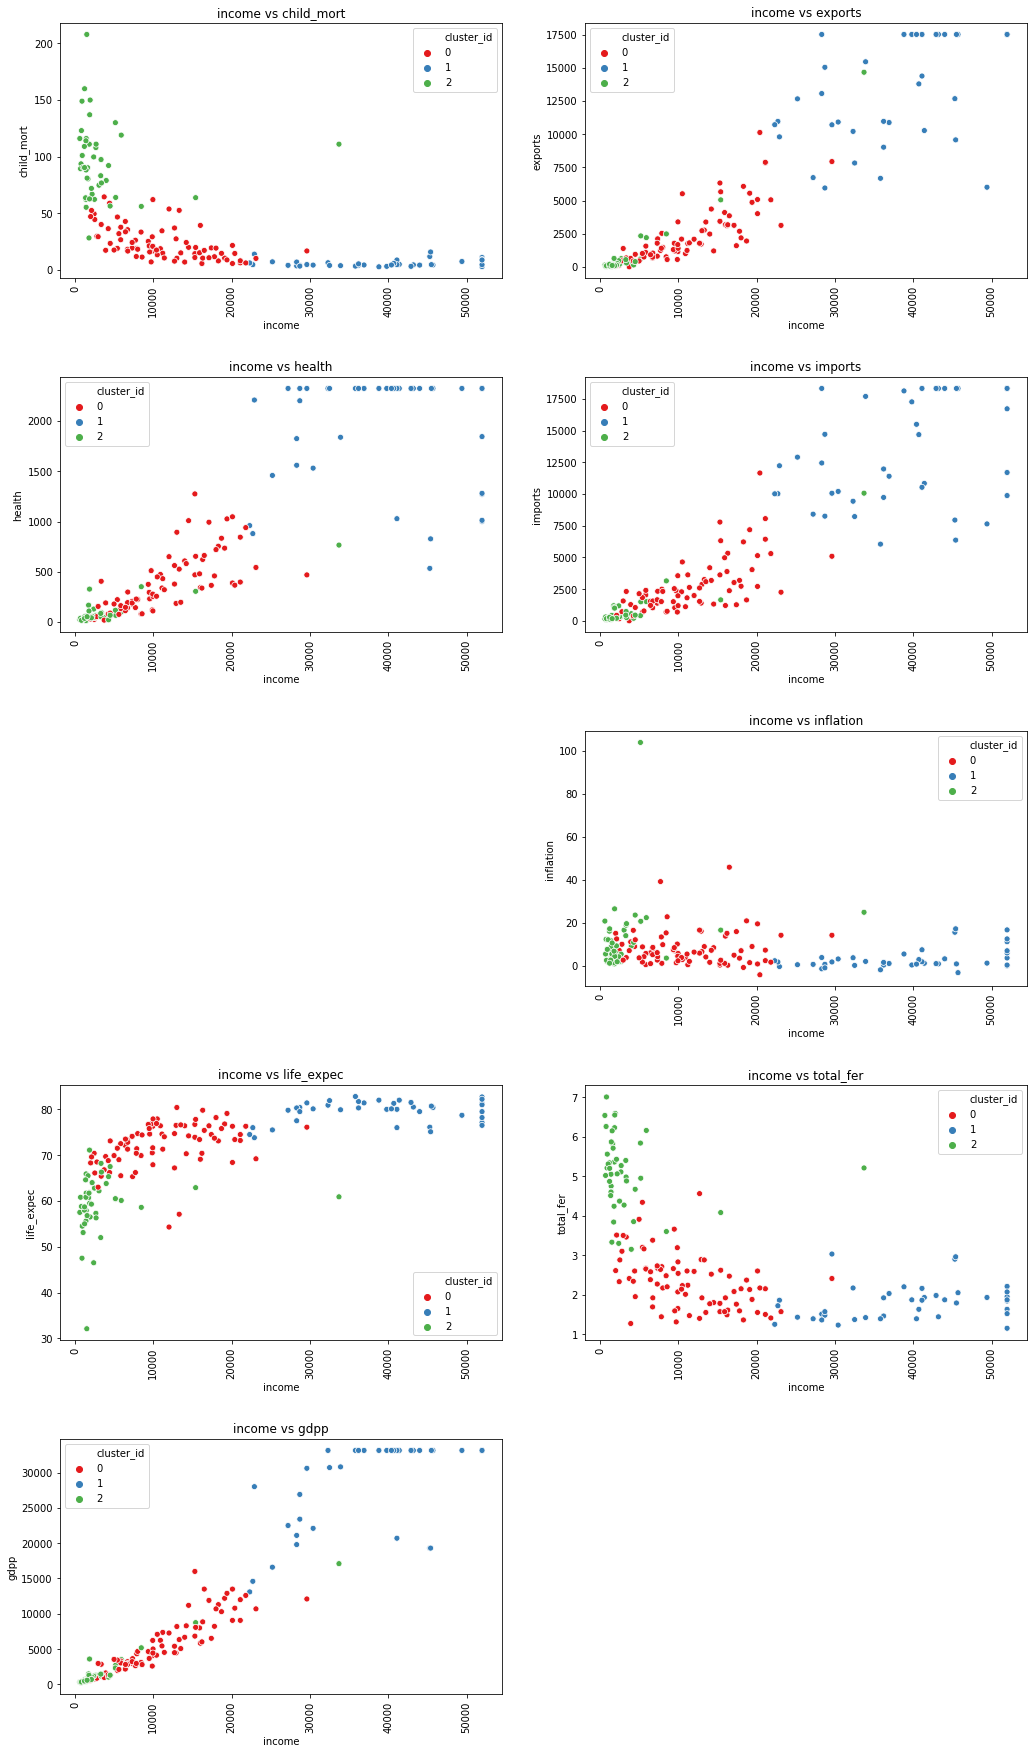

In [47]:
# for plotting scatter plot income with respect to other numerical columns with hue as cluster_id
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    if i[1]!='income':
        plt.subplot(5,2,i[0]+1)
        sns.scatterplot(data=data,y=i[1],x='income',hue='cluster_id',legend='full',palette='Set1')
        plt.xticks(rotation=90)
        plt.title('income vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

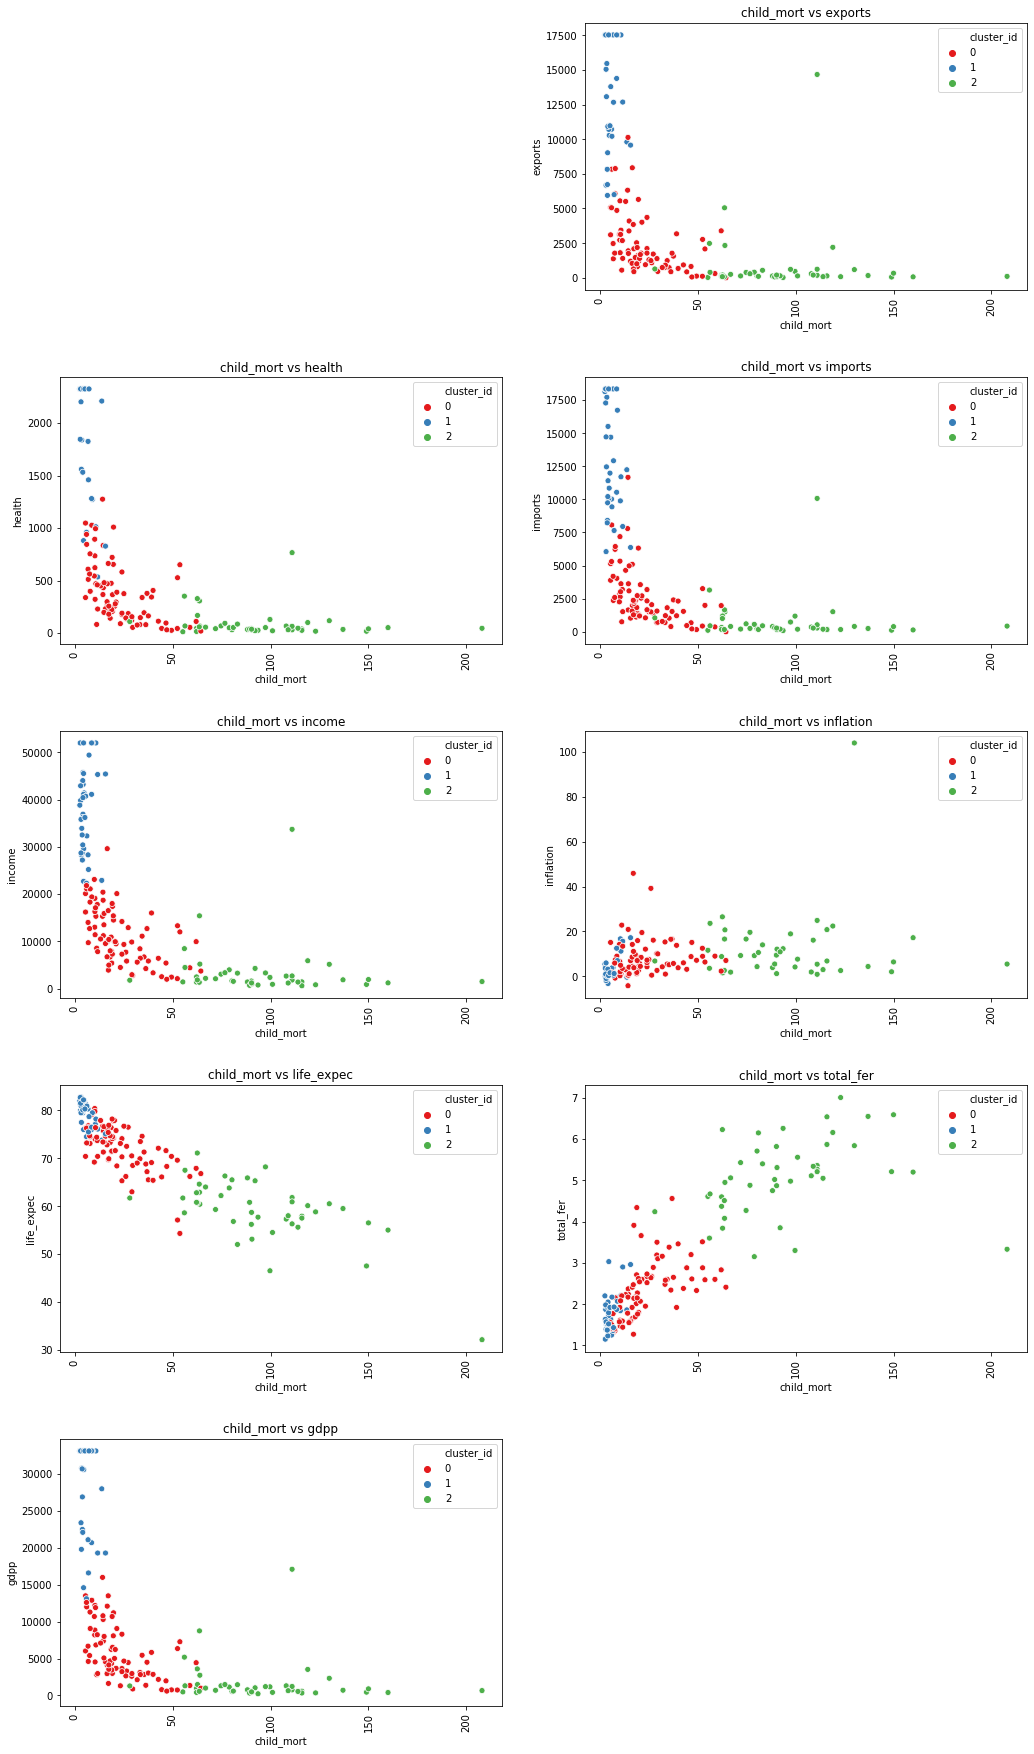

In [48]:
# for plotting scatter plot income with respect to other numerical columns with hue as cluster_id
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    if i[1]!='child_mort':
        plt.subplot(5,2,i[0]+1)
        sns.scatterplot(data=data,y=i[1],x='child_mort',hue='cluster_id',legend='full',palette='Set1')
        plt.xticks(rotation=90)
        plt.title('child_mort vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

### Cluster Profiling 

In [49]:
col=['gdpp','income','child_mort']

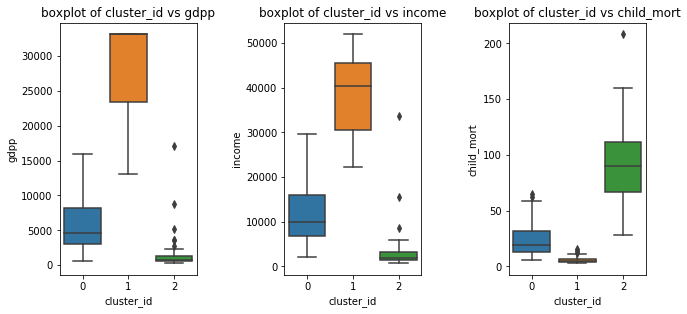

In [50]:
plt.figure(figsize=(10,5))
for i in enumerate(col):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(data=data,x='cluster_id',y=i[1])
    plt.title('boxplot of cluster_id vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

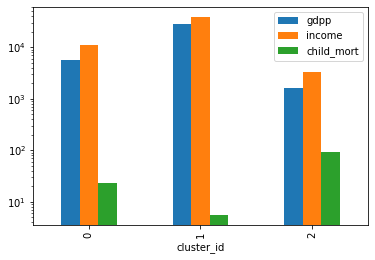

In [51]:
data[col].groupby(data['cluster_id']).mean().plot(kind='bar')
plt.yscale('log')
plt.show()

In [52]:
# Cluster id 2 has very low income and gdpp and very high child_mort, this cluster will be our focus.

### Finding the Countries

In [53]:
# finding countries with cluster_id 2 
c1=data[data['cluster_id']==2]

In [54]:
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2


In [55]:
# sorting the countries 
c1.sort_values(by=['gdpp','child_mort','income'],ascending =[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2


In [56]:
top_10=c1.sort_values(by=['gdpp','child_mort','income'],ascending =[True,False,True]).head(10)

In [57]:
top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2


In [58]:
# top 10 countries 
top_10=top_10.reset_index().drop('index',axis=1)

In [59]:
top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
1,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
2,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
3,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,2
4,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
5,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2
6,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
7,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
8,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2
9,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2


### Top 10 countries obtained from K-Means Model are:

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea

## Hierarchical Clustering

In [60]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

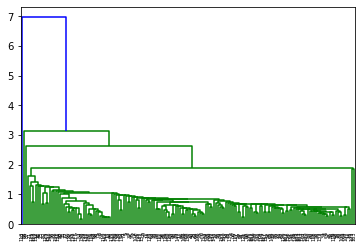

In [61]:
# single linkage
mergings=linkage(data1,method="single",metric='euclidean')
dendrogram(mergings)
plt.show()

###### Single linkage is not interpretable so we will go with complete linkage model.

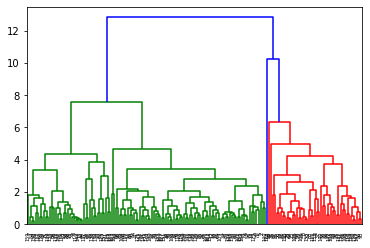

In [62]:
# complete linkage
mergings=linkage(data1,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [63]:
# Looking at dendrogram of hierarchical clustering there can be 2,3 or 4 clusters.
# we will take the cluster value as 2 , it's likely to form 2 clusters better 

In [64]:
# 3 clusters
cluster_labels=cut_tree(mergings,n_clusters=2).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [65]:
# assign cluster labels
data['cluster_labels']=cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


### Plotting the cluster WRT to the data

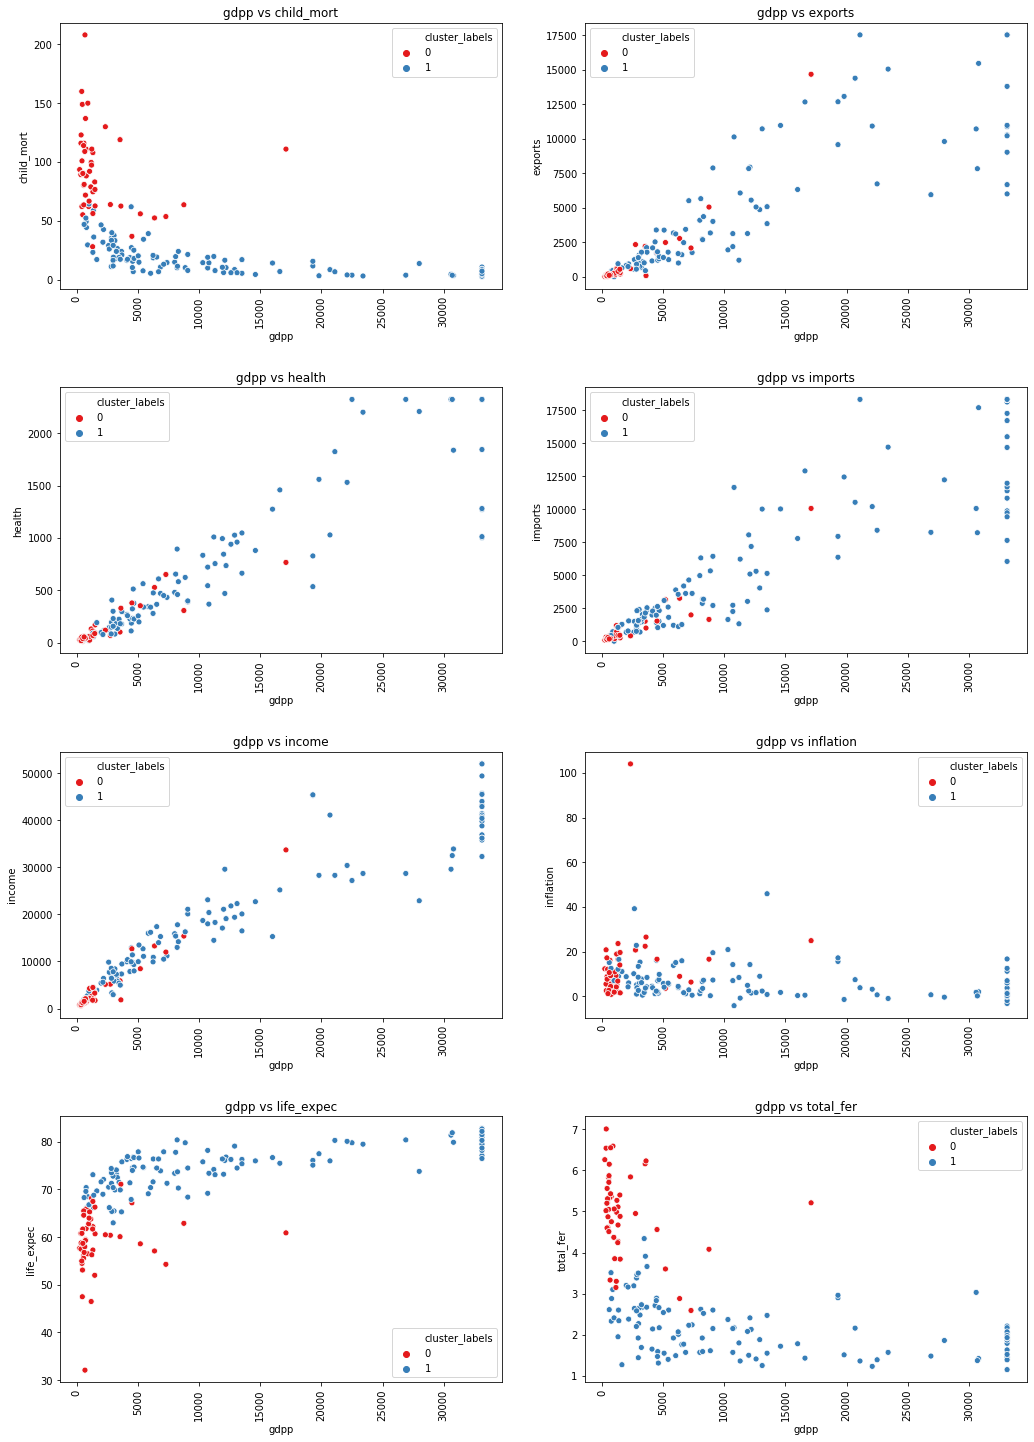

In [66]:
# for plotting scatter plot gdpp with respect to other numerical columns with hue as cluster_labels
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    if i[1]!='gdpp':
        plt.subplot(5,2,i[0]+1)
        sns.scatterplot(data=data,y=i[1],x='gdpp',hue='cluster_labels',legend='full',palette='Set1')
        plt.xticks(rotation=90)
        plt.title('gdpp vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

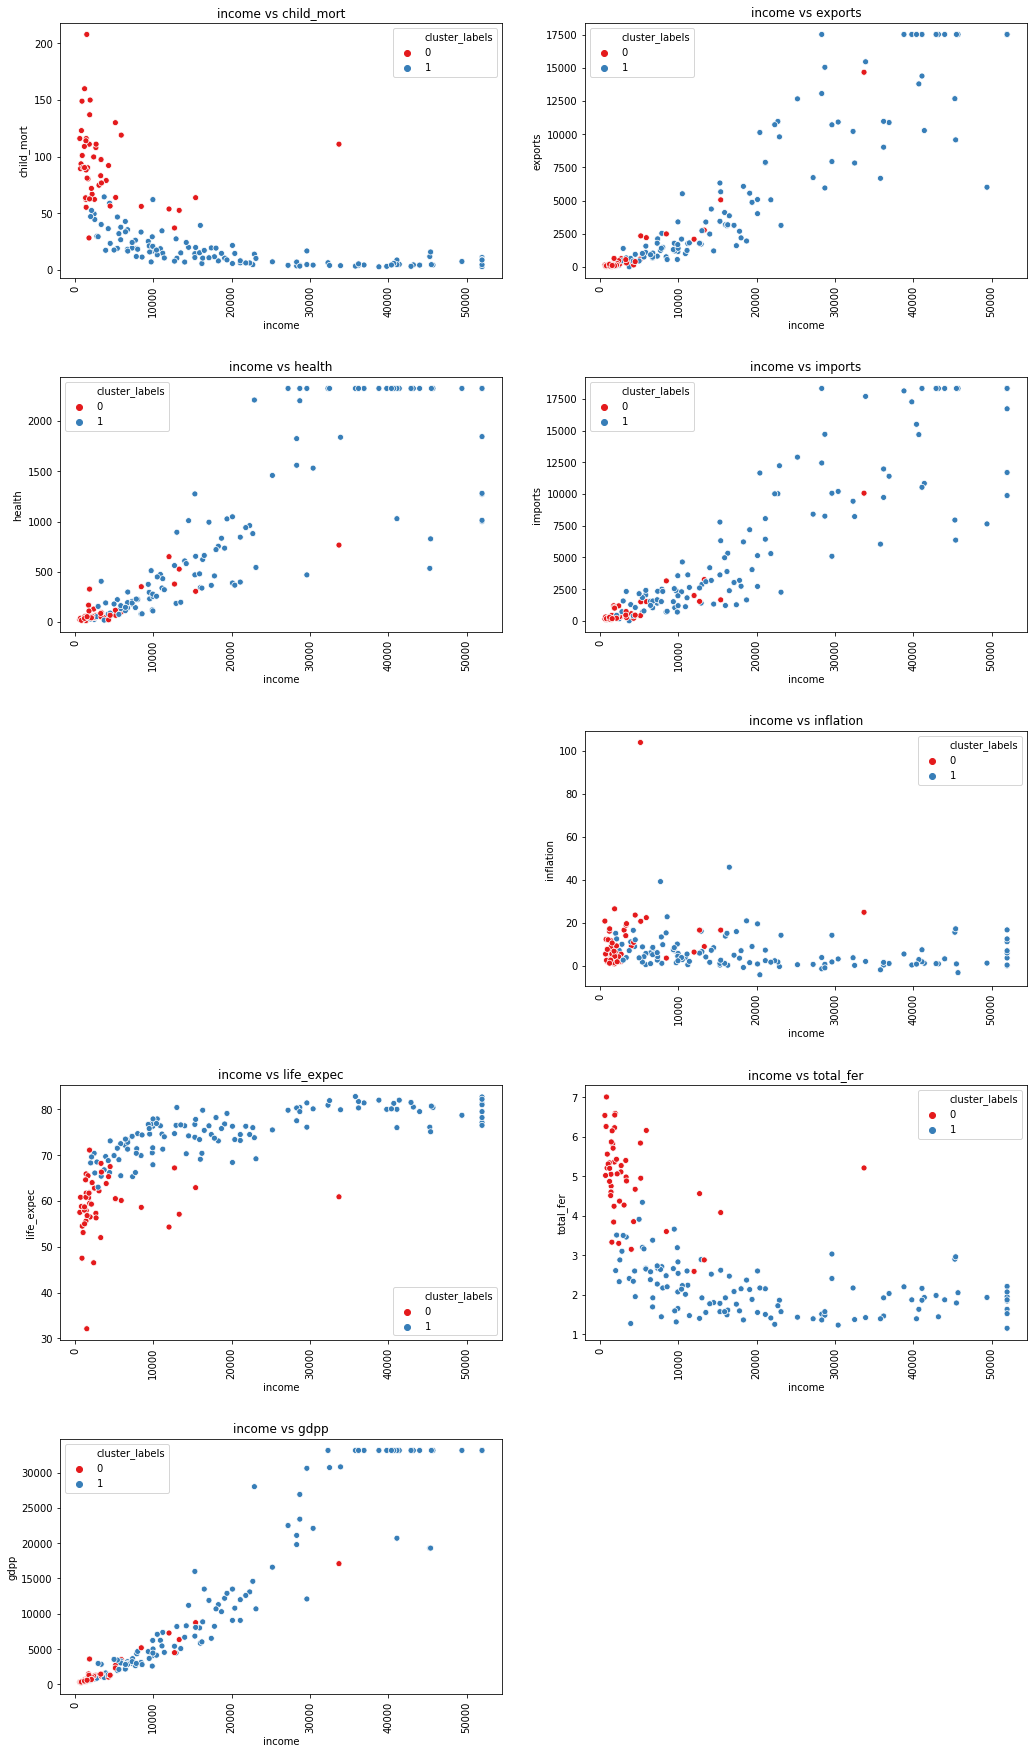

In [67]:
# for plotting scatter plot income with respect to other numerical columns with hue as cluster_labels
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    if i[1]!='income':
        plt.subplot(5,2,i[0]+1)
        sns.scatterplot(data=data,y=i[1],x='income',hue='cluster_labels',legend='full',palette='Set1')
        plt.xticks(rotation=90)
        plt.title('income vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

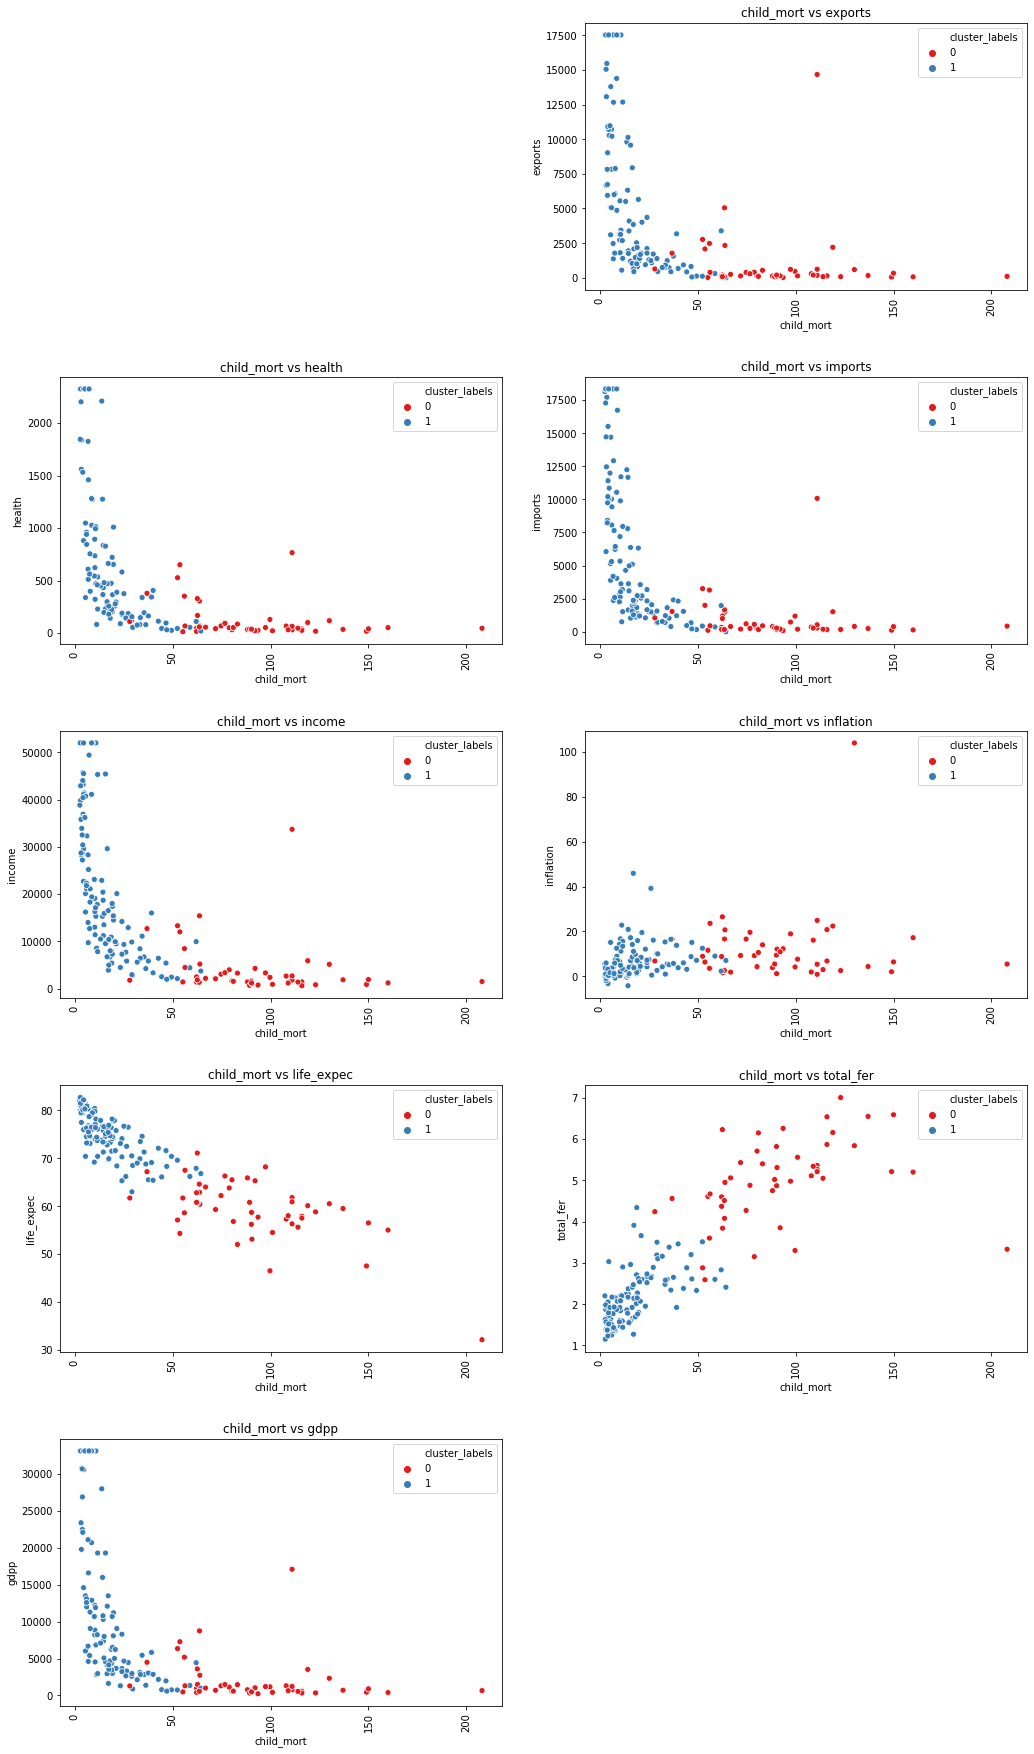

In [68]:
# for plotting scatter plot income with respect to other numerical columns with hue as cluster_labels
plt.figure(figsize=(15,25))
for i in enumerate(cols):
    if i[1]!='child_mort':
        plt.subplot(5,2,i[0]+1)
        sns.scatterplot(data=data,y=i[1],x='child_mort',hue='cluster_labels',legend='full',palette='Set1')
        plt.xticks(rotation=90)
        plt.title('child_mort vs {0}'.format(i[1]))
plt.tight_layout(pad=3.0)
plt.show()

### Cluster Profiling

In [69]:
col=['gdpp','income','child_mort']

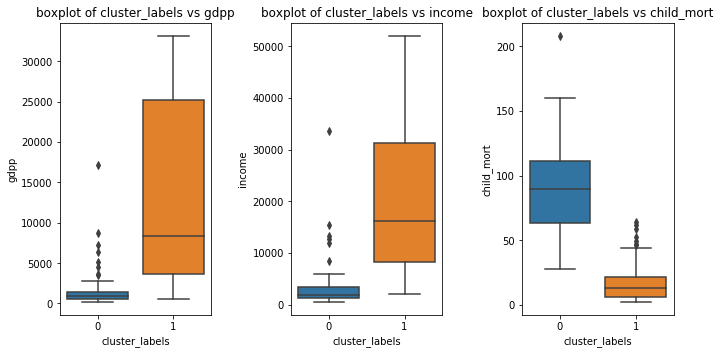

In [70]:
plt.figure(figsize=(10,5))
for i in enumerate(col):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(data=data,x='cluster_labels',y=i[1])
    plt.title('boxplot of cluster_labels vs {0}'.format(i[1]))
plt.tight_layout(pad=1.0)
plt.show()

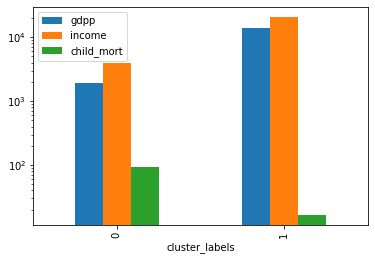

In [71]:
data[col].groupby(data['cluster_labels']).mean().plot(kind='bar')
plt.yscale('log')
plt.show()

In [72]:
# Cluster labels 0 has very low income and gdpp and very high child_mort, this cluster will be our focus.

In [73]:
c2=data[data['cluster_labels']==0]

In [74]:
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0


In [75]:
# sorting the countries 
c2.sort_values(by=['gdpp','child_mort','income'],ascending =[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2,0


In [76]:
top_10_h=c2.sort_values(by=['gdpp','child_mort','income'],ascending =[True,False,True]).head(10)

In [77]:
# top 10 countries 
top_10_h=top_10_h.reset_index().drop('index',axis=1)

In [78]:
top_10_h

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2,0
1,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2,0
2,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2,0
3,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,2,0
4,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2,0
5,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2,0
6,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2,0
7,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2,0
8,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2,0
9,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2,0


### Top 10 countries obtained from Hierarchical Clustering Models are:

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea